Dados Sintéticos
=============
Convolve um espalhador com um refletor

---

In [1]:
from __future__ import print_function
import numpy as np
from scipy.signal import convolve2d
import matplotlib.pyplot as plt

# Importa bibliotecas próprias
from utils import * 

# Configura o matplolib para plotar inline
# %matplotlib qt5
# %matplotlib notebook

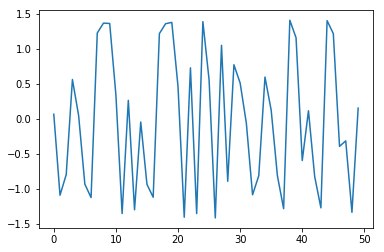

In [2]:
# Curvas caóticas
num_steps = 50

theta = np.random.random()*(2*np.pi)

reflector = np.empty(num_steps, dtype=np.float32)

for i in range(num_steps):
    reflector[i] = np.cos(theta) + np.sin(theta)
    theta *= 2
    
plt.plot(range(num_steps), reflector)
plt.show()

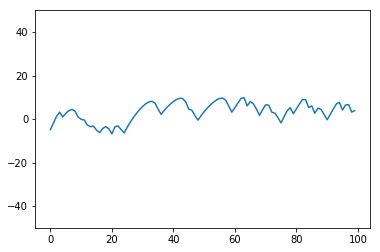

In [3]:
# Random walk com equação caótica
beta = 0.90
sigma = 1.0
#step = np.random.normal(scale=2.0) 
step = (np.random.random() - 0.5) * 4
num_steps = 100
end = 30.0

#max_step = 4.5
#min_step = -max_step

random_walk = np.empty(num_steps, dtype=np.float32)
rms = np.empty(num_steps, dtype=np.float32)
bias = np.arange(0,end,end/num_steps)

theta = np.random.random()*(2*np.pi)

for i in range(num_steps):
    random_walk[i] = step
    rms_step = np.sqrt(np.sum(random_walk[max(i-10,0):i+1]**2))/10
    rms[i] = rms_step
    step = (1-beta)*(np.cos(theta) + np.sin(theta)) + beta*step
    theta *= 2
    #if step > max_step: step = 2*max_step - (step/2)
    #if step < min_step: step = 2*min_step - (step/2)
    
x_coord = np.arange(num_steps)
    
#plt.scatter(range(num_steps), random_walk, marker='s')
plt.plot(range(num_steps), random_walk*20)
plt.ylim((-50,50))

plt.show()

In [4]:
from scipy.interpolate import interp1d

num_steps = 400
max_vert = 50

num_points = np.random.randint(1,8)
x_points = np.zeros(num_points+2, dtype=np.int)
y_points = np.zeros(num_points+2, dtype=np.int)
x_points[1:-1] = np.random.randint(1,num_steps,size=num_points)
x_points[-1] = num_steps-1
y_points[1:] = np.random.randint(-max_vert,max_vert,size=num_points+1)

spline = interp1d(x_points, y_points, kind='cubic')
x_coords = np.arange(num_steps)

plt.plot(x_coords, spline(x_coords))
plt.plot(x_points, y_points, 'o')

plt.show()

ValueError: Expect x to be a 1-D sorted array_like.

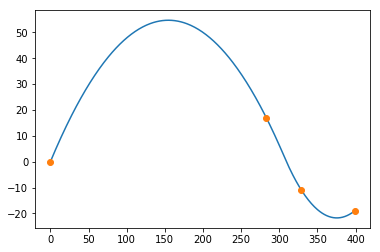

In [5]:
from scipy import interpolate

num_steps = 400
max_vert = 20

num_points = np.random.randint(1,8)
x_points = np.zeros(num_points+2, dtype=np.int)
y_points = np.zeros(num_points+2, dtype=np.int)
x_points[1:-1] = np.random.randint(1,num_steps,size=num_points)
x_points[-1] = num_steps-1
x_points = np.sort(x_points)
y_points[1:] = np.random.randint(-max_vert,max_vert,size=num_points+1)

tck = interpolate.splrep(x_points, y_points, s=0.0, k=2)
x_coords = np.arange(num_steps)
curve = interpolate.splev(x_coords, tck)

plt.plot(x_coords, curve)
plt.plot(x_points, y_points, 'o')

plt.show()

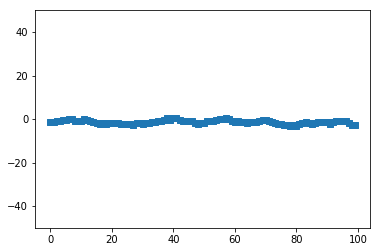

In [6]:
# Random walk with momentum
beta = 0.50
sigma = 1.0
step = np.random.normal(scale=2.0) 
num_steps = 100
end = 30.0

#max_step = 4.5
#min_step = -max_step

random_walk = np.empty(num_steps, dtype=np.float32)
rms = np.empty(num_steps, dtype=np.float32)
bias = np.arange(0,end,end/num_steps)


for i in range(num_steps):
    random_walk[i] = step
    rms_step = np.sqrt(np.sum(random_walk[max(i-10,0):i+1]**2))/10
    rms[i] = rms_step
    step = (1-beta)*np.random.normal(loc=step, scale=sigma) + beta*step
    #if step > max_step: step = 2*max_step - (step/2)
    #if step < min_step: step = 2*min_step - (step/2)
    
x_coord = np.arange(num_steps)
    
plt.scatter(range(num_steps), random_walk, marker='s')
#plt.plot(range(num_steps), rms)
plt.ylim((-50,50))

plt.show()

In [7]:

x_range = np.arange(0, 10*np.pi, np.pi/100.0)
signal = np.sin(x_range)

freqs = np.fft.fft(signal, d=1/100.0)

print(freqs)

#plt.plot(x_range, signal)
#plt.show()

TypeError: fft() got an unexpected keyword argument 'd'

Visualiza dado. Botão esquerdo imprime pick com evento=1.0 e botão direito com evento=0.0

Carregando o empilhamento ./difracoes_migradas/jequitinhonha_migrado.su
2079 traços:
 - CDP: [2 - 2080]
 - Amostras por traço (ns): 876
 - Tempo entre amostras (dt): 4.0 ms
Dimensões do dado 1: (876, 2079)

Tamanho da imagem (em polegadas): 28.88 x 12.17
Coordenadas:  x - [2.0, 2081.0], y - [0.0, 3.5]
Dimensão: (876, 2079)



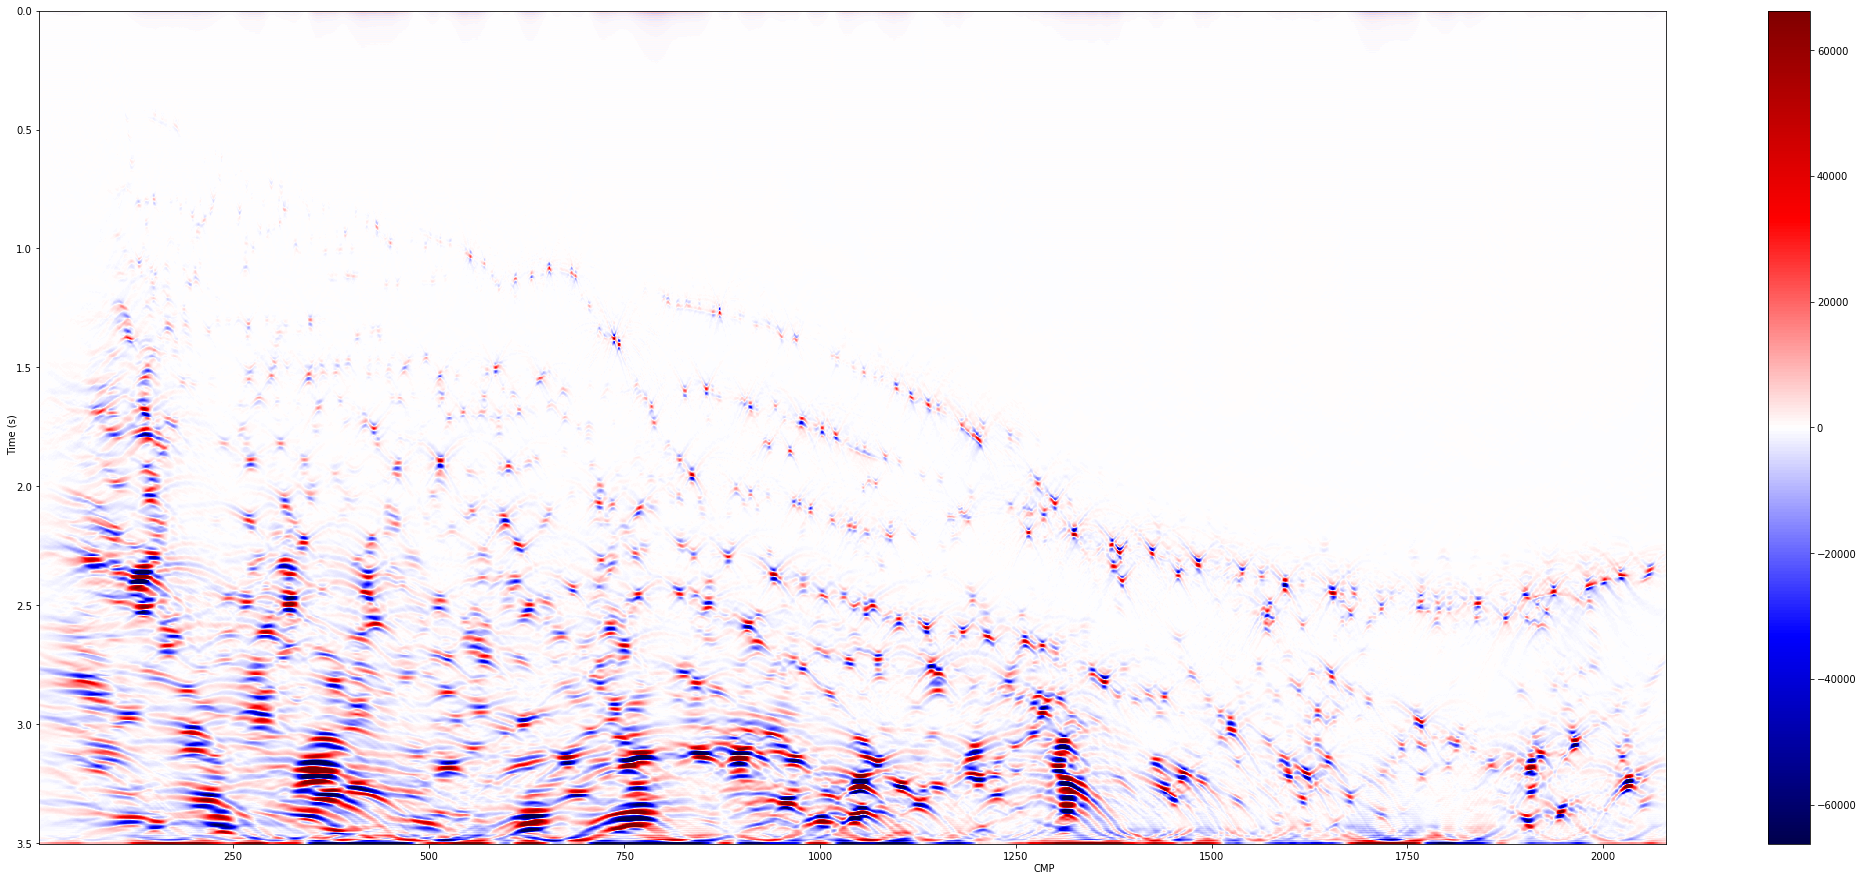

In [8]:
# Definição de arquivos de entrada
stack_file = './difracoes_migradas/jequitinhonha_migrado.su'

color = 'seismic'
plot_bar = True
clip = 0.3

# Carrega dados
if not stack_file is None: 
    traces = load_traces(stack_file)
    stack_image = get_data_from_traces(traces)
    print("Dimensões do dado 1:", stack_image.shape)
    print()

multiple_event_viewer(stack_image,
             cdp_offset=traces[0].cdp, dt=traces[0].dt,
             clip_percent1=clip, color1=color)

Converte coordenada de em (cdp, tempo) para índices da matriz

In [9]:
coord = 'evento=0.0, cdp=835.555810, tempo=1.950138'

time_ind = coord.find('tempo=')
time = float(coord[time_ind+6:])
cdp = np.floor(float(coord[coord.find('cdp=')+4:time_ind-2]))
pick_coords = picks_to_index([(cdp, time)], traces)
print("cdp:", cdp, "tempo:", time)
print("picks:", pick_coords)

cdp: 835.0 tempo: 1.950138
picks: [(487, 833)]


Gera função de _taper_

[0.97552824 0.9045085  0.7938926  0.6545085  0.49999997 0.34549147
 0.20610741 0.09549147 0.0244717  0.        ]


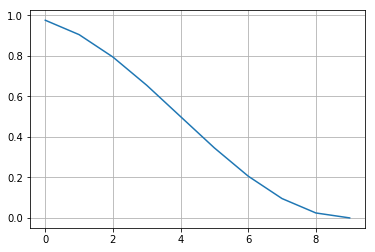

In [10]:
import matplotlib.pyplot as plt

taper_size = 10

taper = (np.pi / (taper_size)) * (np.arange(taper_size).astype(np.float32) + 1.0)
taper = (np.cos(taper) / 2.0) + 0.5
print(taper)

plt.plot(range(taper_size), taper)
plt.grid()

plt.show()

Gerar espalhador com _taper_

Espelhamento das amostras (flip): False
Tamanho da imagem (em polegadas): 7.08 x 7.08
Coordenadas:  x - [0.0, 51.0], y - [0.0, 0.2]
Dimensão: (51, 51)



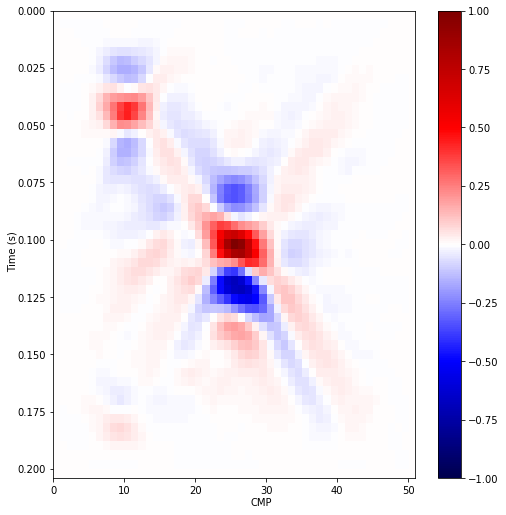

In [11]:
# Define tamanho da janela ao redor do espalhador
window_size = 31
taper_size = 10

color = 'seismic'
resize = 10.0


scatter = generate_samples(stack_image, window_size+2*taper_size, pick_coords, flip=False)[0][0]

#Normaliza o espalhador
vmax = np.max(np.abs((scatter.max(), scatter.min())))
scatter = scatter / vmax
original = scatter.copy()

taper = taper.reshape((1,taper_size))

scatter = apply_taper(scatter, taper_size)

title1 = 'Espalhador com taper'
title1 = ''
title2 = 'Espalhador sem taper'

multiple_event_viewer(scatter, dt=traces[0].dt, #original,
                      resize=resize, color1=color, color2=color,
                     title1=title1, title2=title2)

Extrai frequencia do espalhador. Baseado na equação apresentada em http://subsurfwiki.org/wiki/Ricker_wavelet 

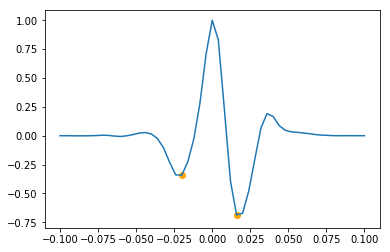

Freq. lóbulo esquerdo: 19.4924200308419
Freq. lóbulo direito: 24.365525038552377


In [12]:
center = scatter.shape[0] / 2
dt = traces[0].dt 

center_trace = scatter[:,center]
left_lobe = center_trace[0:center].min()
right_lobe = center_trace[center:].min()

left_time = np.where(center_trace == left_lobe)[0][0] * dt - (center*dt)
right_time = np.where(center_trace == right_lobe)[0][0] * dt - (center*dt)

time_axis = np.arange(scatter.shape[0], dtype=np.float32) * dt - (center*dt)

plt.plot(time_axis, center_trace)
plt.scatter([left_time, right_time], [left_lobe, right_lobe], color='orange')

plt.show()

left_freq = np.abs(np.sqrt(1.5) / (np.pi * left_time))
right_freq = np.abs(np.sqrt(1.5) / (np.pi * right_time))

print("Freq. lóbulo esquerdo:", left_freq)
print("Freq. lóbulo direito:", right_freq)


Computa Ricker com as frequências extraídas

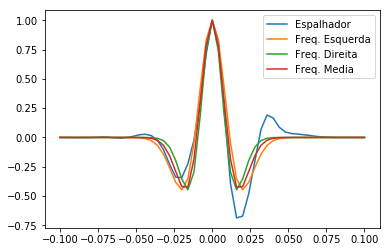

In [13]:
def ricker_wavelet(times, frequency):
    """
    Computa a Ricker Wavelet para os tempos e frequência da entrada.
    
    Args:
        times: vetor com os tempos a serem computados.
        frequency: frequência da wavelet.
        
    Retorno:
        wavelet: vetor de amplitudes da wavelet para cada ponto
    """
    cte = -(np.pi**2)*(frequency**2)
    exp = np.exp(cte*(times**2))
    wavelet = exp + 2*cte*(times**2)*exp
    return wavelet

left_wavelet = ricker_wavelet(time_axis, left_freq)
right_wavelet = ricker_wavelet(time_axis, right_freq)
avg_wavelet = ricker_wavelet(time_axis, (left_freq+right_freq)/2)

plt.plot(time_axis, center_trace, label="Espalhador")
plt.plot(time_axis, left_wavelet, label="Freq. Esquerda")
plt.plot(time_axis, right_wavelet, label="Freq. Direita")
plt.plot(time_axis, avg_wavelet, label="Freq. Media")
plt.legend()


plt.show()


Gerar dado sintético

Tamanho da imagem (em polegadas): 6.94 x 6.94
Coordenadas:  x - [0.0, 200.0], y - [0.0, 200.0]
Dimensão: (200, 200)



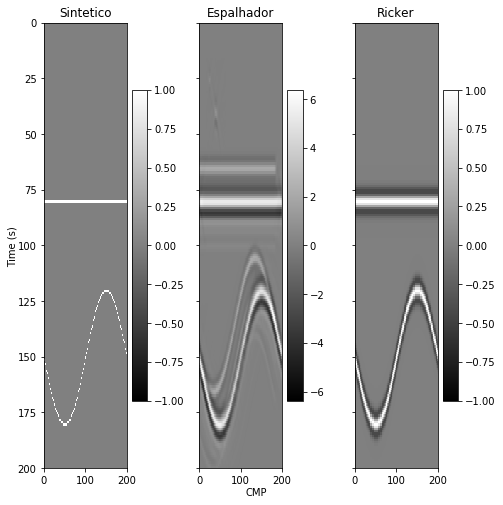

In [14]:
color = 'gray'
resize = 2.5

synthetic = np.zeros((200,200), dtype=np.float32)

# Interface plana
synthetic[80,:] = 1.0

# Ruído aleatório
#x_random = np.random.randint(0, 200, size=800)
#y_random = np.random.randint(0, 40, size=800)
#synthetic[y_random,x_random] = 1.0
synthetic[40,40] = 1.0

x_range = np.arange(0, 200)
indices = np.sin(x_range*(np.pi/100)) * 30.0 + 150.0
indices = np.round(indices).astype(np.int)

synthetic[indices,x_range] = 1.0


avg_wavelet = avg_wavelet.reshape((1,avg_wavelet.size)).T

synthetic_scatter = convolve2d(synthetic, scatter, mode='same')
synthetic_ricker = convolve2d(synthetic, avg_wavelet, mode='same')

title1 = 'Sintetico'
title2 = 'Espalhador'
title3 = 'Ricker'

multiple_event_viewer(synthetic, synthetic_scatter, synthetic_ricker,
                      resize=resize, color1=color, color2=color, color3=color,
                     title1=title1, title2=title2, title3=title3)

Carregando o empilhamento ./reflexoes_migradas/solimoes_migrado.sgy
2206 traços:
 - CDP: [17 - 2223]
 - Amostras por traço (ns): 751
 - Tempo entre amostras (dt): 4.0 ms
Dimensões do dado 1: (751, 2206)

Tamanho da imagem (em polegadas): 30.64 x 10.43
Coordenadas:  x - [17.0, 2223.0], y - [0.0, 3.0]
Dimensão: (751, 2206)



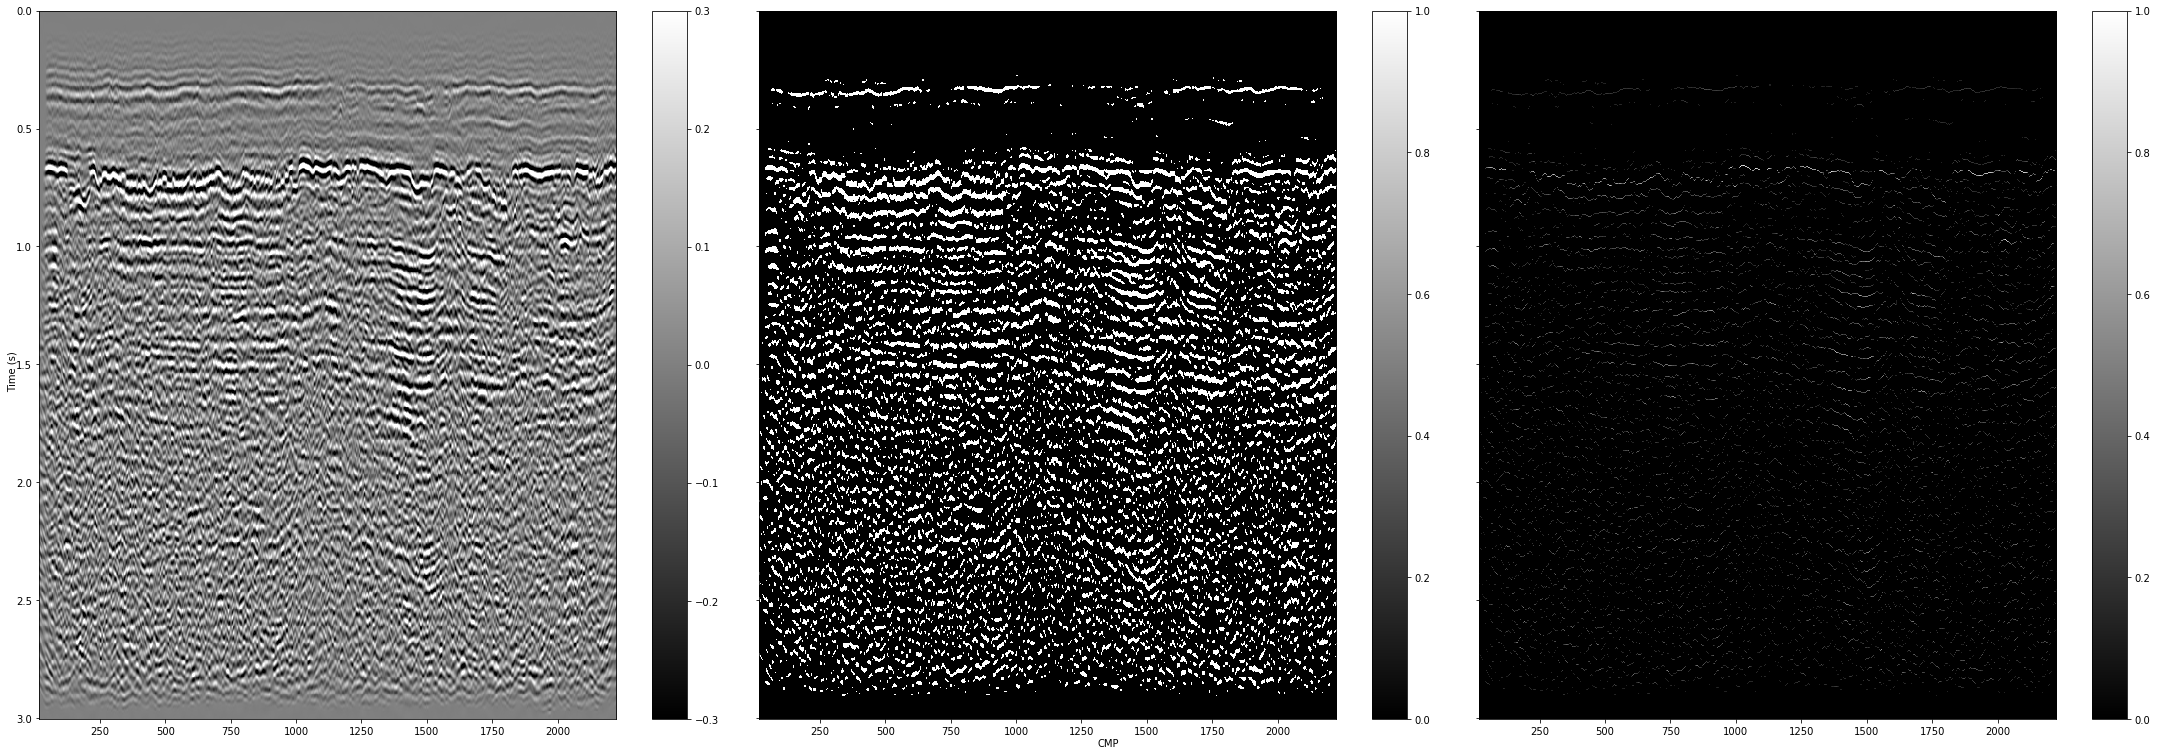

In [15]:
# Extrator de arestas
from skimage.morphology import skeletonize

# Definição de arquivos de entrada
stack_file = './reflexoes_migradas/solimoes_migrado.sgy'

# Definição filtro
threshold = 0.12

# Definição plot
color = 'gray'
clip = 0.3

# Carrega dados
if not stack_file is None: 
    traces = load_traces(stack_file)
    stack_image = get_data_from_traces(traces)
    print("Dimensões do dado 1:", stack_image.shape)
    print()
    
# Normaliza
vmax = np.abs((stack_image.min(), stack_image.max())).max()
stack_image /= vmax
    
# Torna dado binario
binary_image = stack_image.copy()
indices = np.where(binary_image < 0.0)
binary_image[indices] = 0.0
binary_image /= binary_image.max()
binary_image[binary_image < threshold] = 0.0
binary_image[binary_image >= threshold] = 1.0

# Aplica detector de arestas
binary_edges = skeletonize(binary_image)
gray_edges = binary_edges * stack_image



multiple_event_viewer(stack_image, binary_image, gray_edges,
             vmin2=0.0, vmax2=1.0, vmin3=gray_edges.min(), vmax3=gray_edges.max(),
             cdp_offset=traces[0].cdp, dt=traces[0].dt,
             clip_percent1=clip, color1=color, color2=color, color3=color)

(51, 1) (51, 13)
Tamanho da imagem (em polegadas): 7.08 x 7.08
Coordenadas:  x - [0.0, 51.0], y - [0.0, 0.2]
Dimensão: (51, 51)



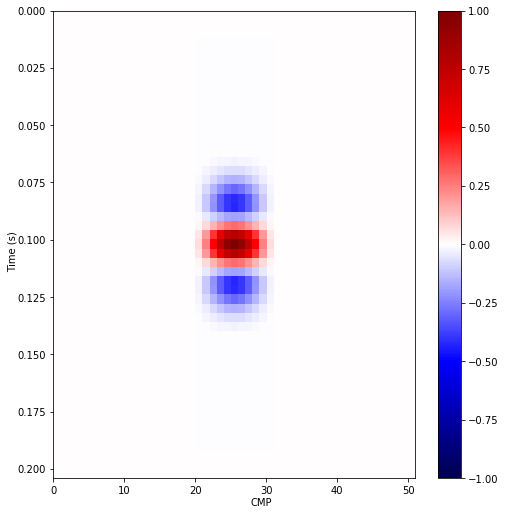

In [17]:
taper_size = 6

wavelet = avg_wavelet.reshape((1,avg_wavelet.size)).T

wavelet_2D = np.empty((wavelet.shape[0], taper_size*2+1), dtype=np.float32)
print(wavelet.shape, wavelet_2D.shape)

for i in range(wavelet_2D.shape[1]):
    wavelet_2D[:,i] = wavelet.flatten()
    
wavelet_2D = apply_taper(wavelet_2D, taper_size)

background = np.zeros((51,51))
background[:, 51/2-6:51/2+7] += wavelet_2D

multiple_event_viewer(background, resize=10.0, color1='seismic', dt=traces[0].dt)

In [18]:

wavelet = avg_wavelet.reshape((1,avg_wavelet.size)).T

synthetic_psf = convolve2d(gray_edges, scatter, mode='same')
#synthetic_ricker = convolve2d(gray_edges, wavelet_2D, mode='same')
synthetic_ricker = convolve2d(gray_edges, wavelet, mode='same')



Tamanho da imagem (em polegadas): 22.46 x 7.49
Coordenadas:  x - [1303.0, 1534.0], y - [1.5, 1.8]
Dimensão: (77, 231)



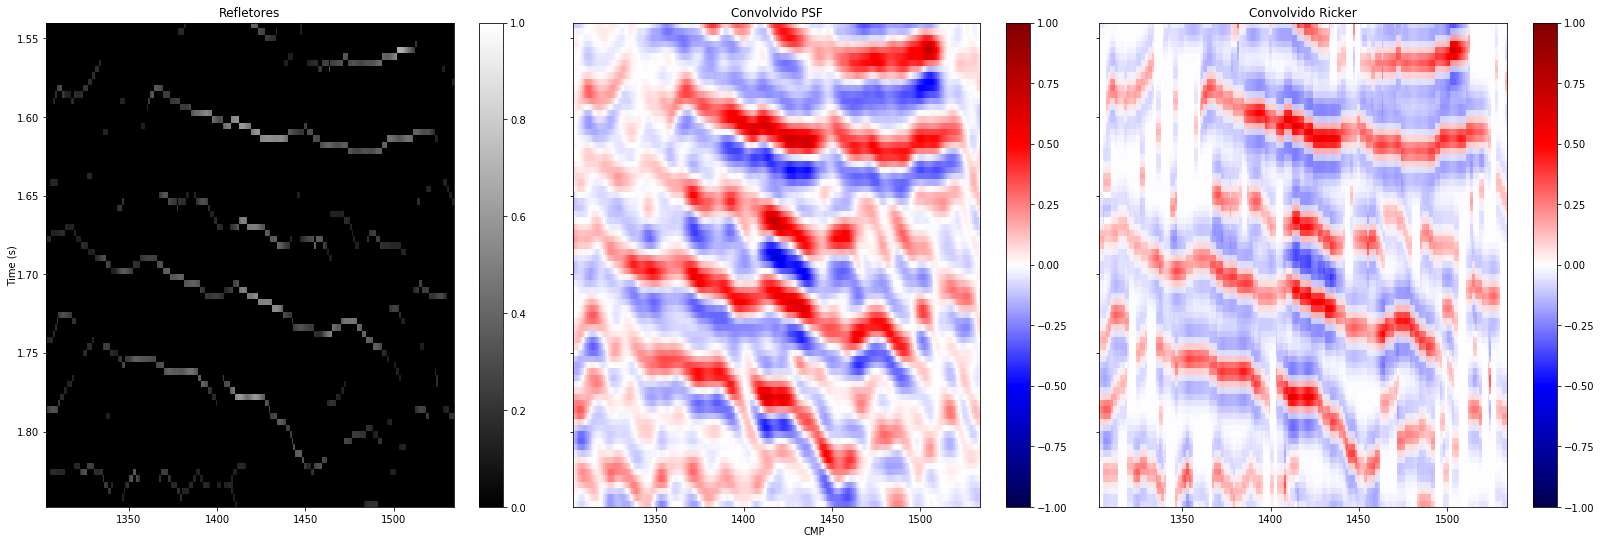

In [19]:
title1 = 'Refletores'
title2 = 'Convolvido PSF'
title3 = 'Convolvido Ricker'

color = 'seismic'

resize = 7.0

y_begin, x_begin = picks_to_index([(1303.835223, 1.540451)], traces)[0]
y_end, x_end = picks_to_index([(1534.616626, 1.849841)], traces)[0]

vmax = np.max(np.abs(synthetic_psf))
synthetic_psf /= vmax
vmax = np.max(np.abs(synthetic_ricker))
synthetic_ricker /= vmax

multiple_event_viewer(gray_edges, synthetic_psf, synthetic_ricker,
                      x_begin=x_begin, x_end=x_end, y_begin=y_begin, y_end=y_end,
                      cdp_offset=traces[0].cdp, dt=traces[0].dt,
                     vmin1=0.0, vmax1=1.0,
                     resize=resize, color1='gray', color2=color, color3=color,
                     #bar1=False, bar2=False, bar3=False,
                     title1=title1, title2=title2, title3=title3)

In [20]:

# W1
taper_size = 6

wavelet = avg_wavelet.reshape((1,avg_wavelet.size)).T
wavelet_1 = np.empty((wavelet.shape[0], taper_size*2+1), dtype=np.float32)
print(wavelet.shape, wavelet_1.shape)
for i in range(wavelet_1.shape[1]):
    wavelet_1[:,i] = wavelet.flatten()
wavelet_1 = apply_taper(wavelet_1, taper_size)

# W2
taper_size = 10

wavelet = avg_wavelet.reshape((1,avg_wavelet.size)).T

wavelet_2 = np.empty((wavelet.shape[0], taper_size*2+1), dtype=np.float32)
print(wavelet.shape, wavelet_2.shape)

for i in range(wavelet_2.shape[1]):
    wavelet_2[:,i] = wavelet.flatten()
    
wavelet_2 = apply_taper(wavelet_2, taper_size)

# Convolução
synthetic_ricker1 = convolve2d(gray_edges, wavelet_1, mode='same')
synthetic_ricker2 = convolve2d(gray_edges, wavelet_2, mode='same')

y_begin, x_begin = picks_to_index([(1303.835223, 1.540451)], traces)[0]
y_end, x_end = picks_to_index([(1534.616626, 1.849841)], traces)[0]

vmax = np.max(np.abs(synthetic_ricker1))
synthetic_ricker1 /= vmax
vmax = np.max(np.abs(synthetic_ricker2))
synthetic_ricker2 /= vmax

diff = synthetic_ricker1 - synthetic_ricker2

(51, 1) (51, 13)
(51, 1) (51, 21)


Tamanho da imagem (em polegadas): 30.64 x 10.43
Coordenadas:  x - [17.0, 2223.0], y - [0.0, 3.0]
Dimensão: (751, 2206)



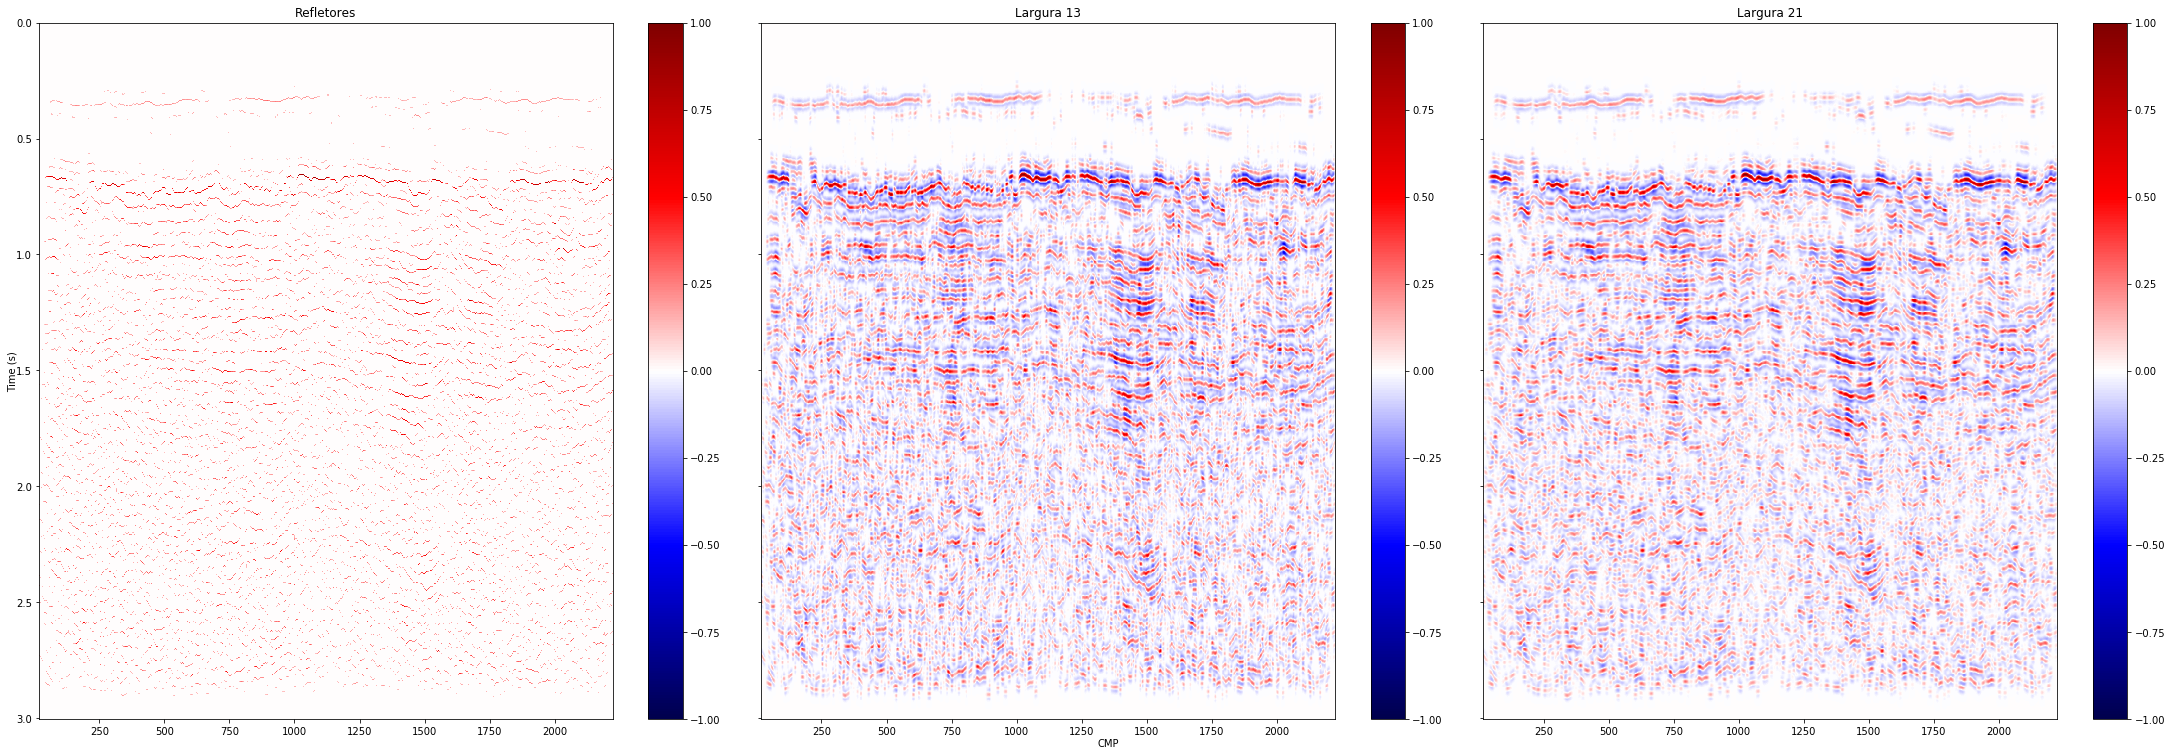

In [21]:
title1 = 'Refletores'
title2 = 'Largura 13'
title3 = 'Largura 21'

resize = 1.0

multiple_event_viewer(gray_edges, synthetic_ricker1, synthetic_ricker2,
                      #x_begin=x_begin, x_end=x_end, y_begin=y_begin, y_end=y_end,
                      cdp_offset=traces[0].cdp, dt=traces[0].dt,
                     vmin1=-1.0, vmax1=1.0,
                     resize=resize, color1='seismic', color2=color, color3=color,
                     #bar1=False, bar2=False, bar3=False,
                     title1=title1, title2=title2, title3=title3)

In [22]:
diff.min()

-0.13398696

In [ ]:
import utils
reload(utils)
from utils import *

In [28]:
#y_begin, x_begin = picks_to_index([(1.540451, 1303.835223)])
#y_end, x_end = picks_to_index([(1.849841, 1534.616626)])
y_begin, x_begin = picks_to_index([(1303.835223, 1.540451)], traces)
y_end, x_end = picks_to_index([(1534.616626, 1.849841)], traces)


[(385, 1286)]
[(462, 1517)]
